In [19]:
#this script compares trajectories from both light conditions and computes complexity of path using box dimension analysis
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import csv
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import glob 
import seaborn as sns
sns.set(style="ticks")
import cv2
import pylab as pl
import time
from scipy import stats
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#process images as linear interprolator and use sliding kernel to average more
# look to parrelelize this 

In [20]:
source = r"E:\Downloads\MothAbdominal\Centroids_Trimmed"
fig_path = r"E:\Downloads\MothAbdominal\Fractal_Dimension"

In [21]:
df = pd.read_csv(source + "\\Experimental_1_0_52688.csv")
x,y = df.X_position.values, df.Y_position.values

In [22]:
len(x)

208

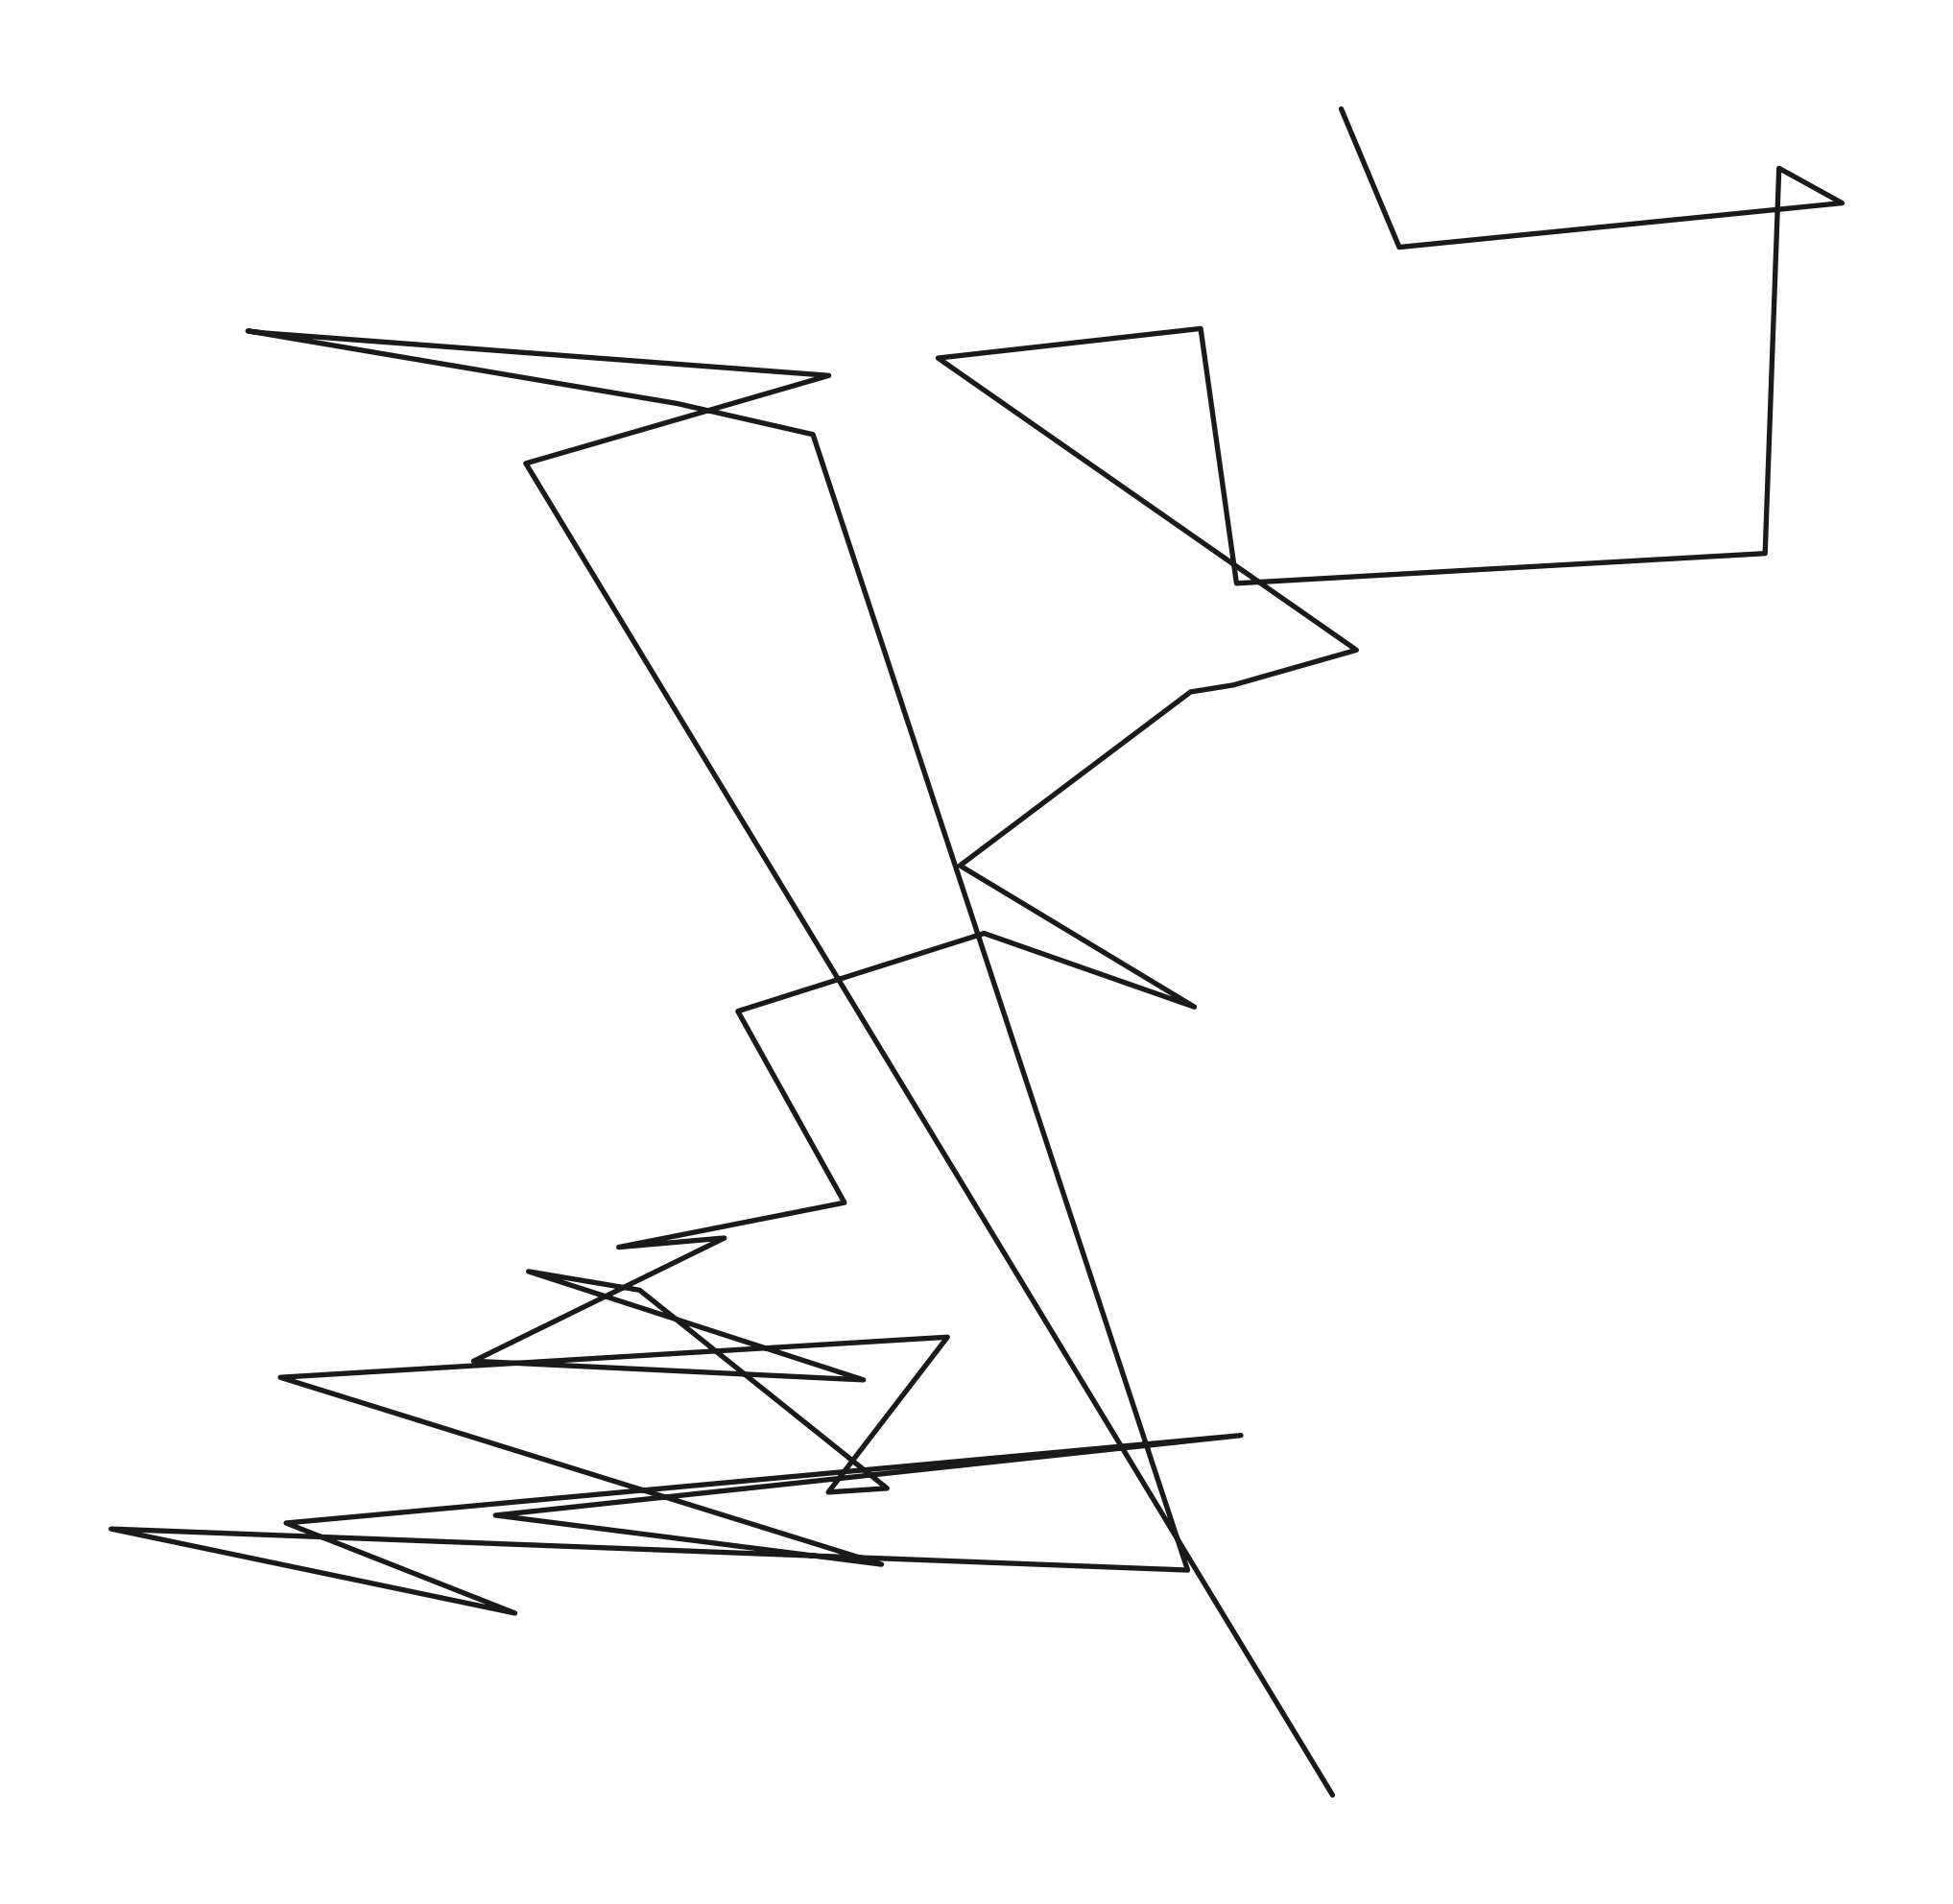

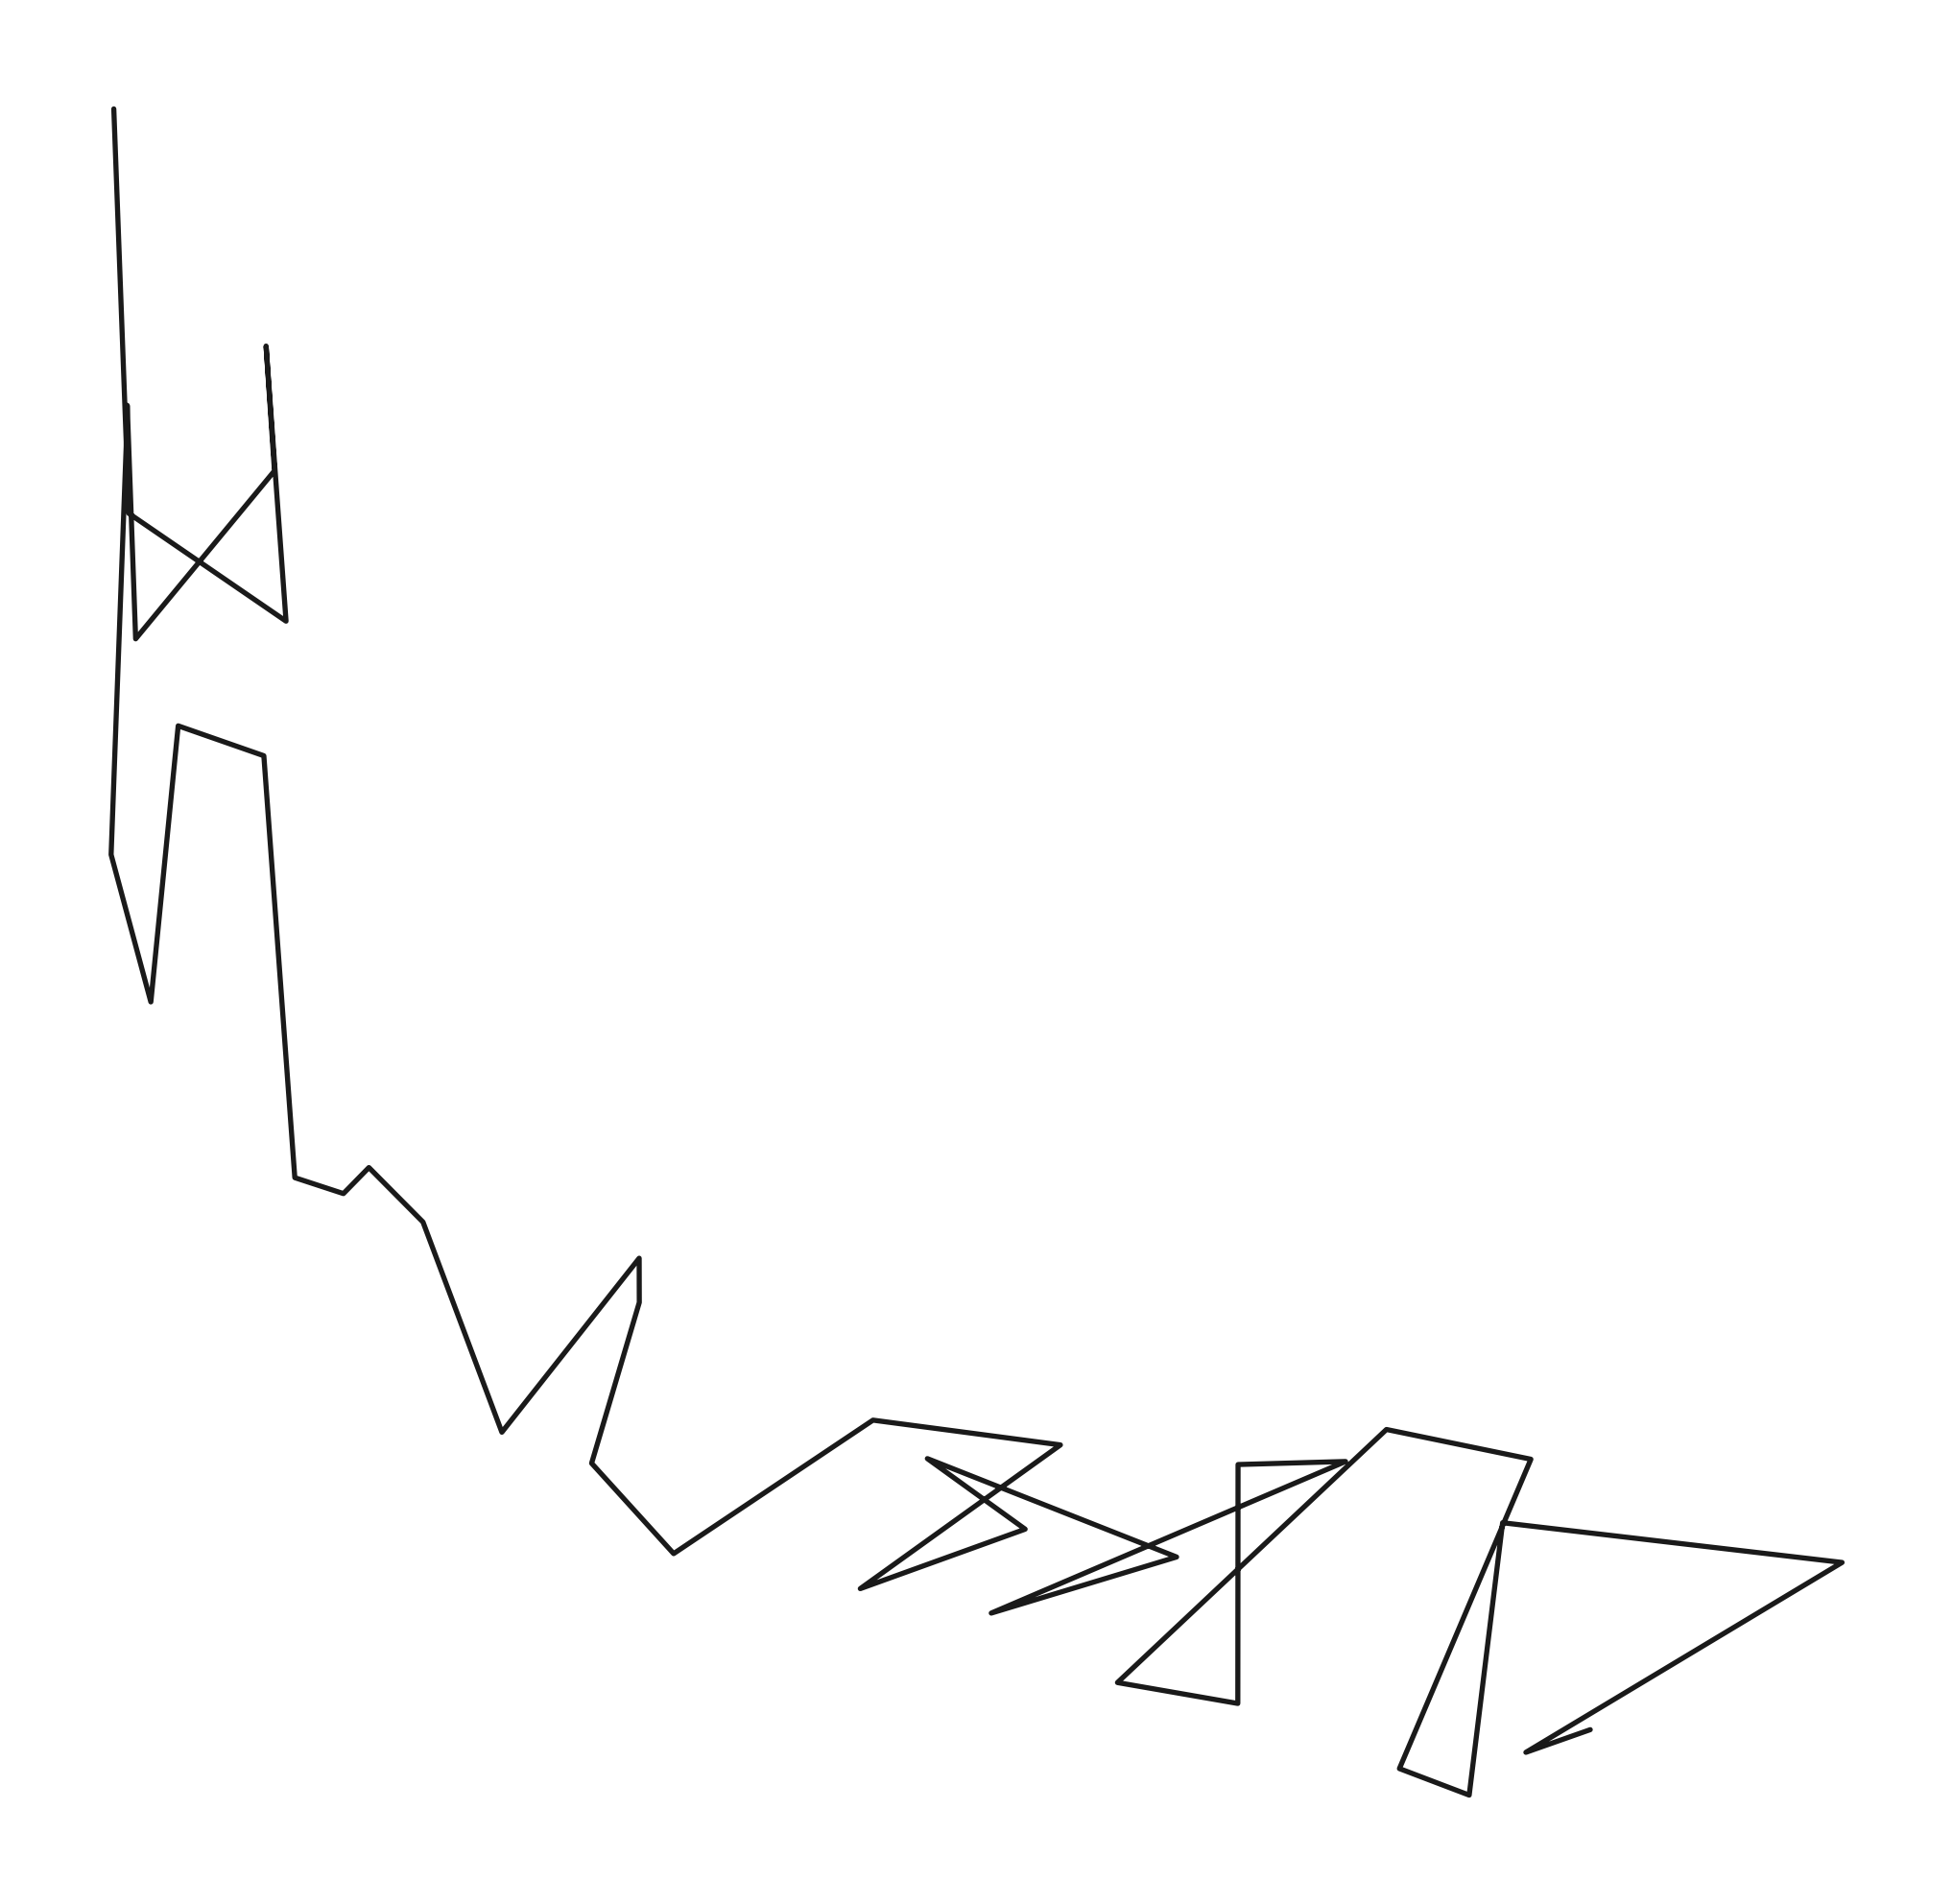

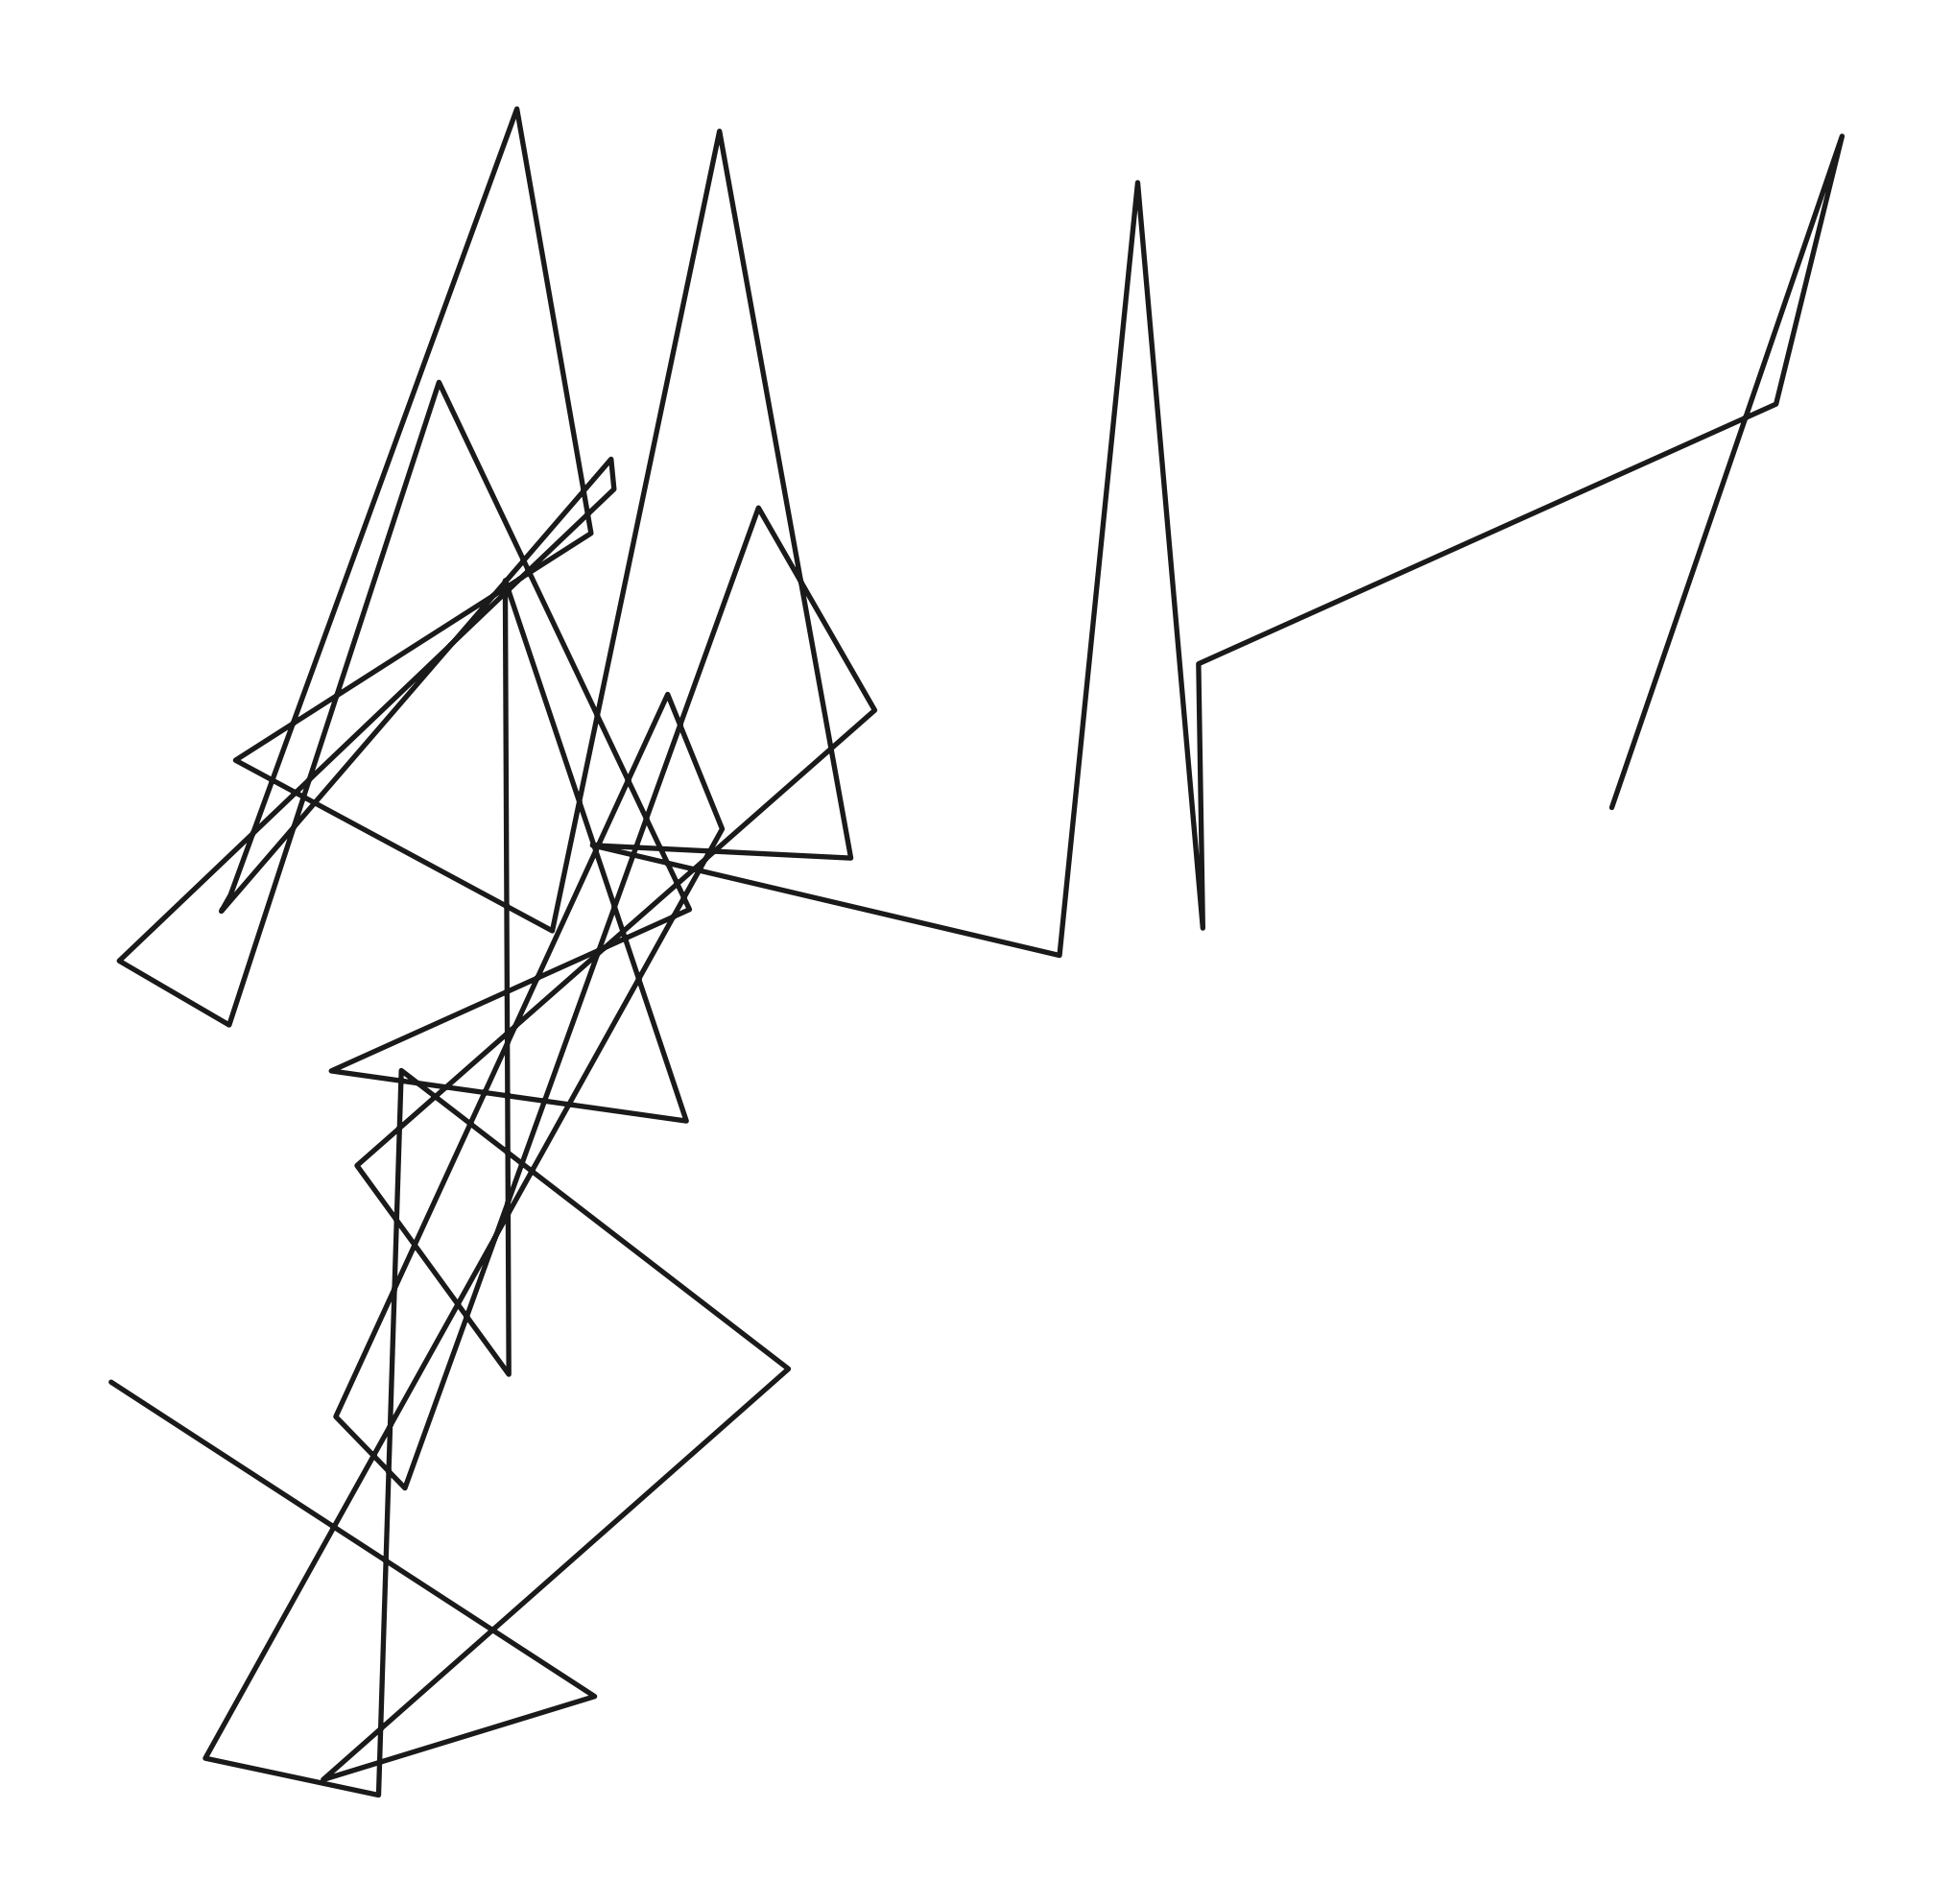

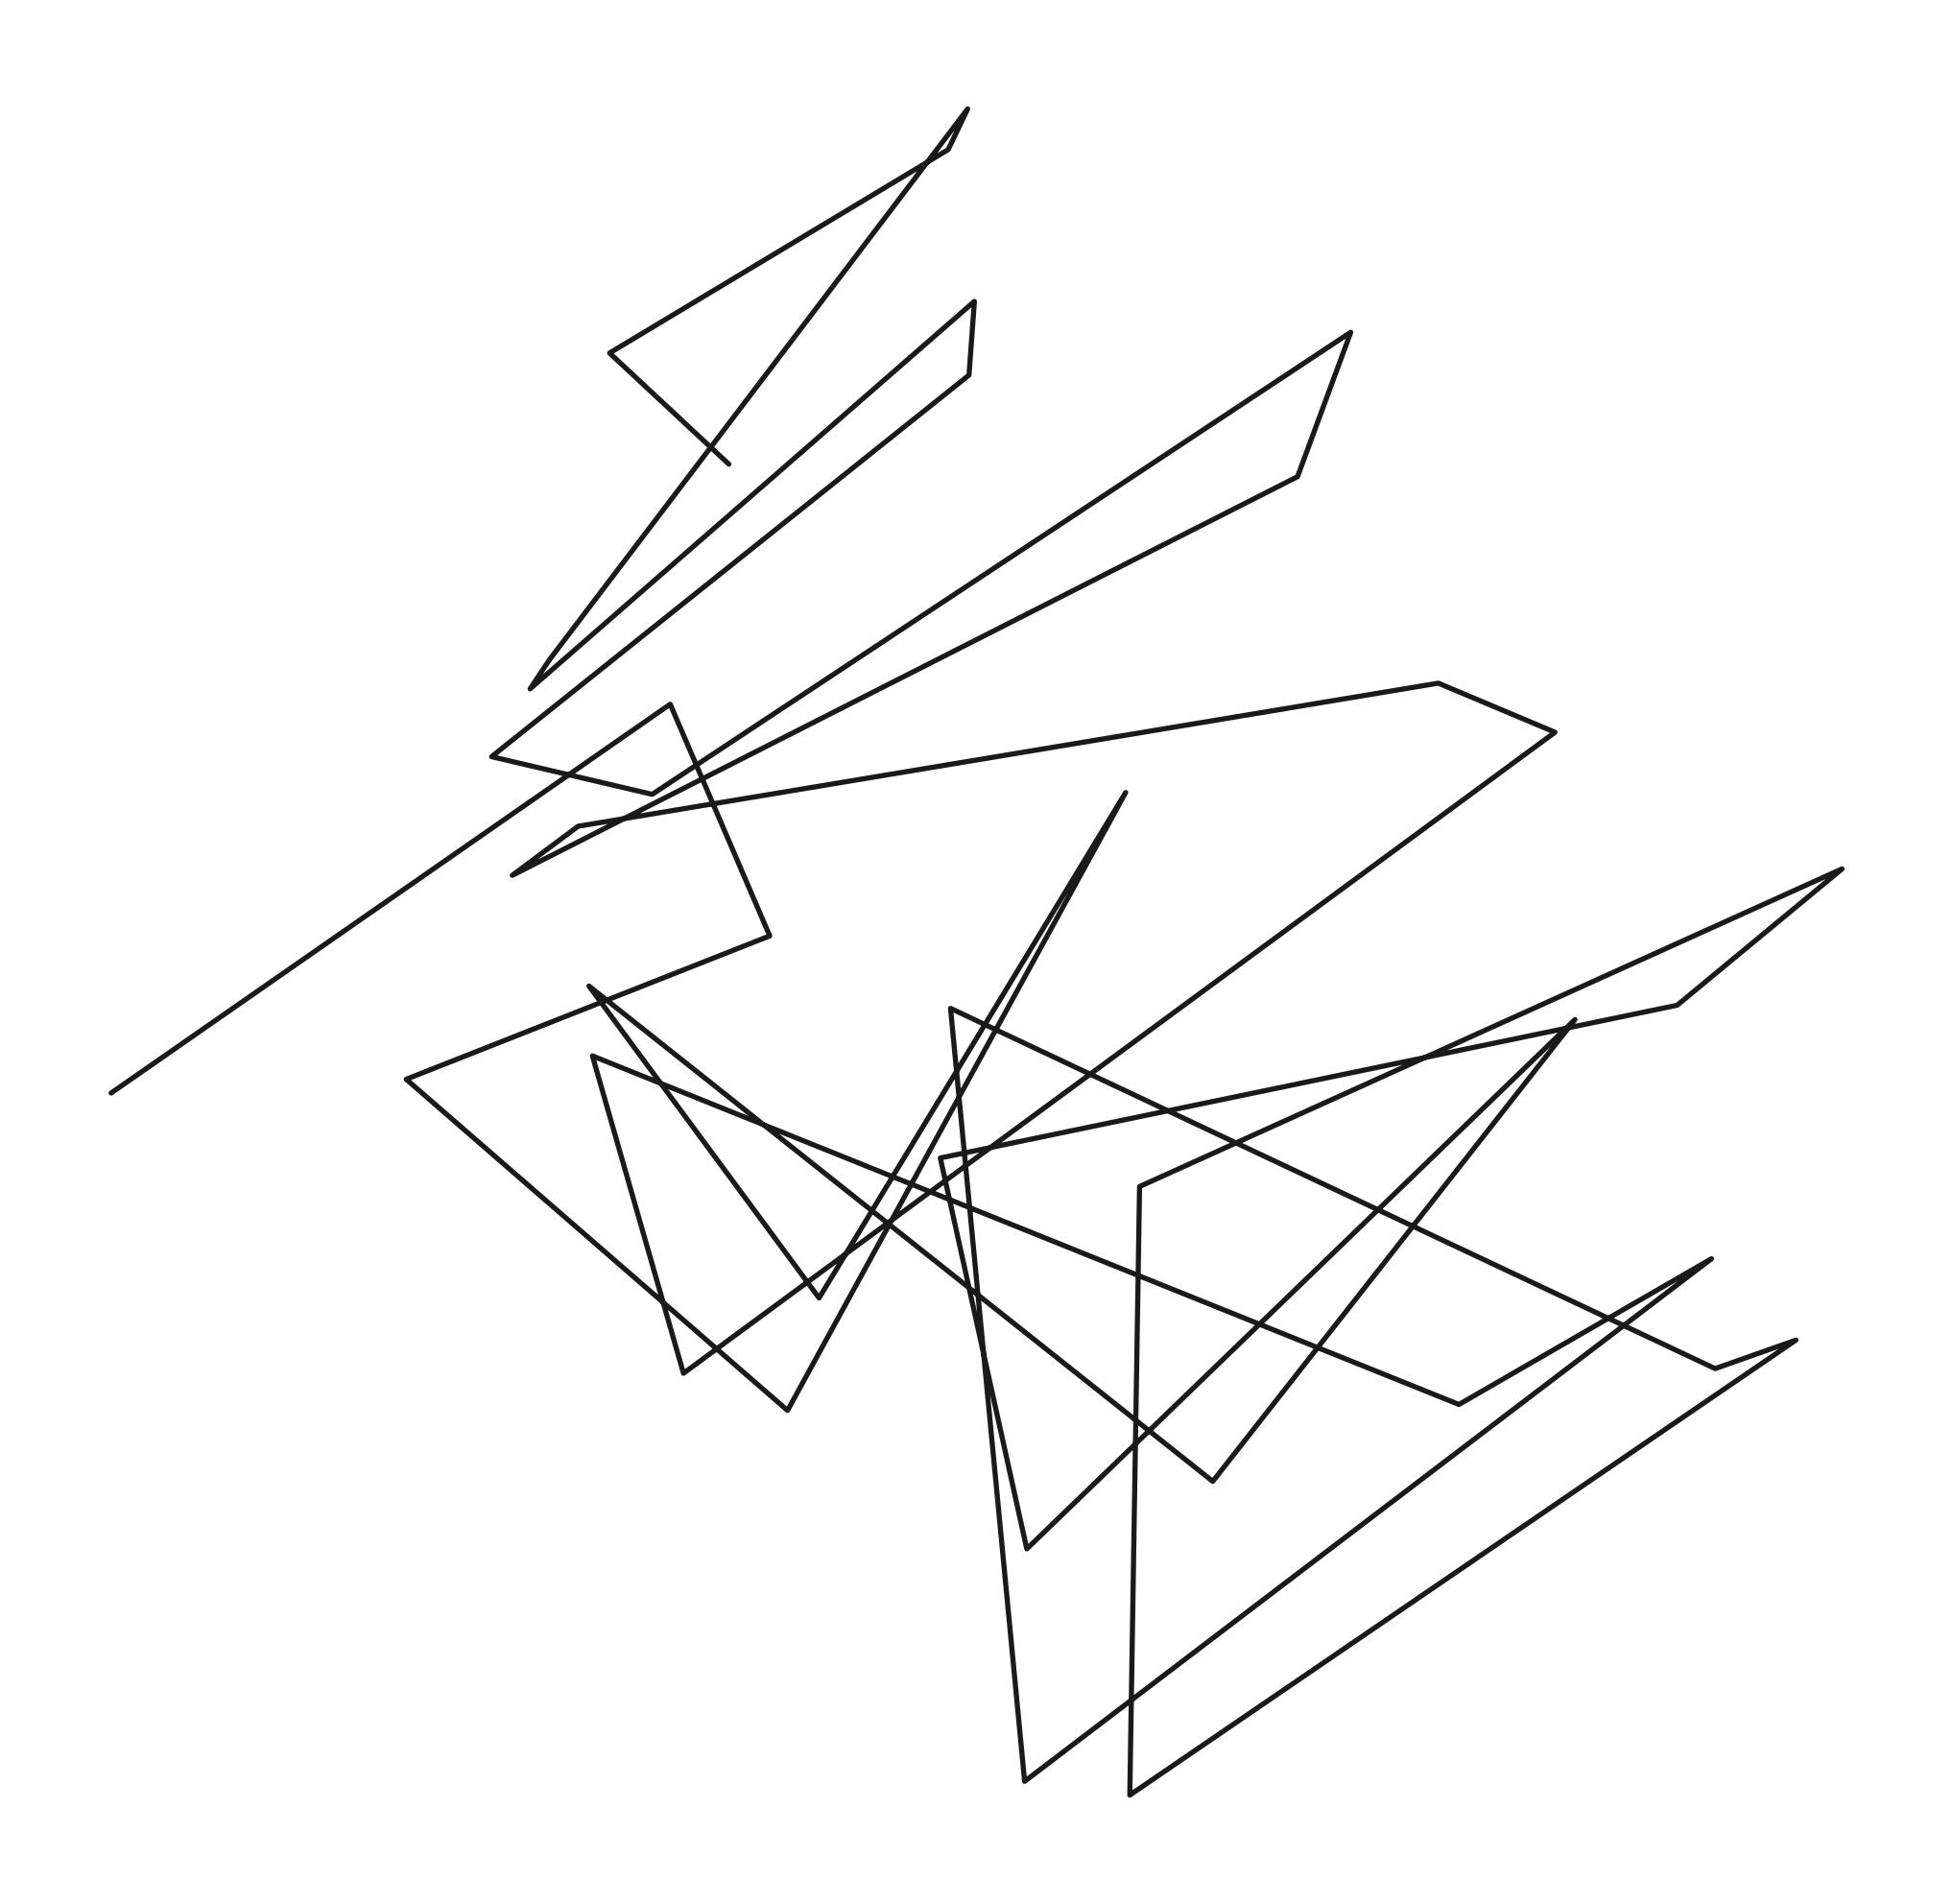

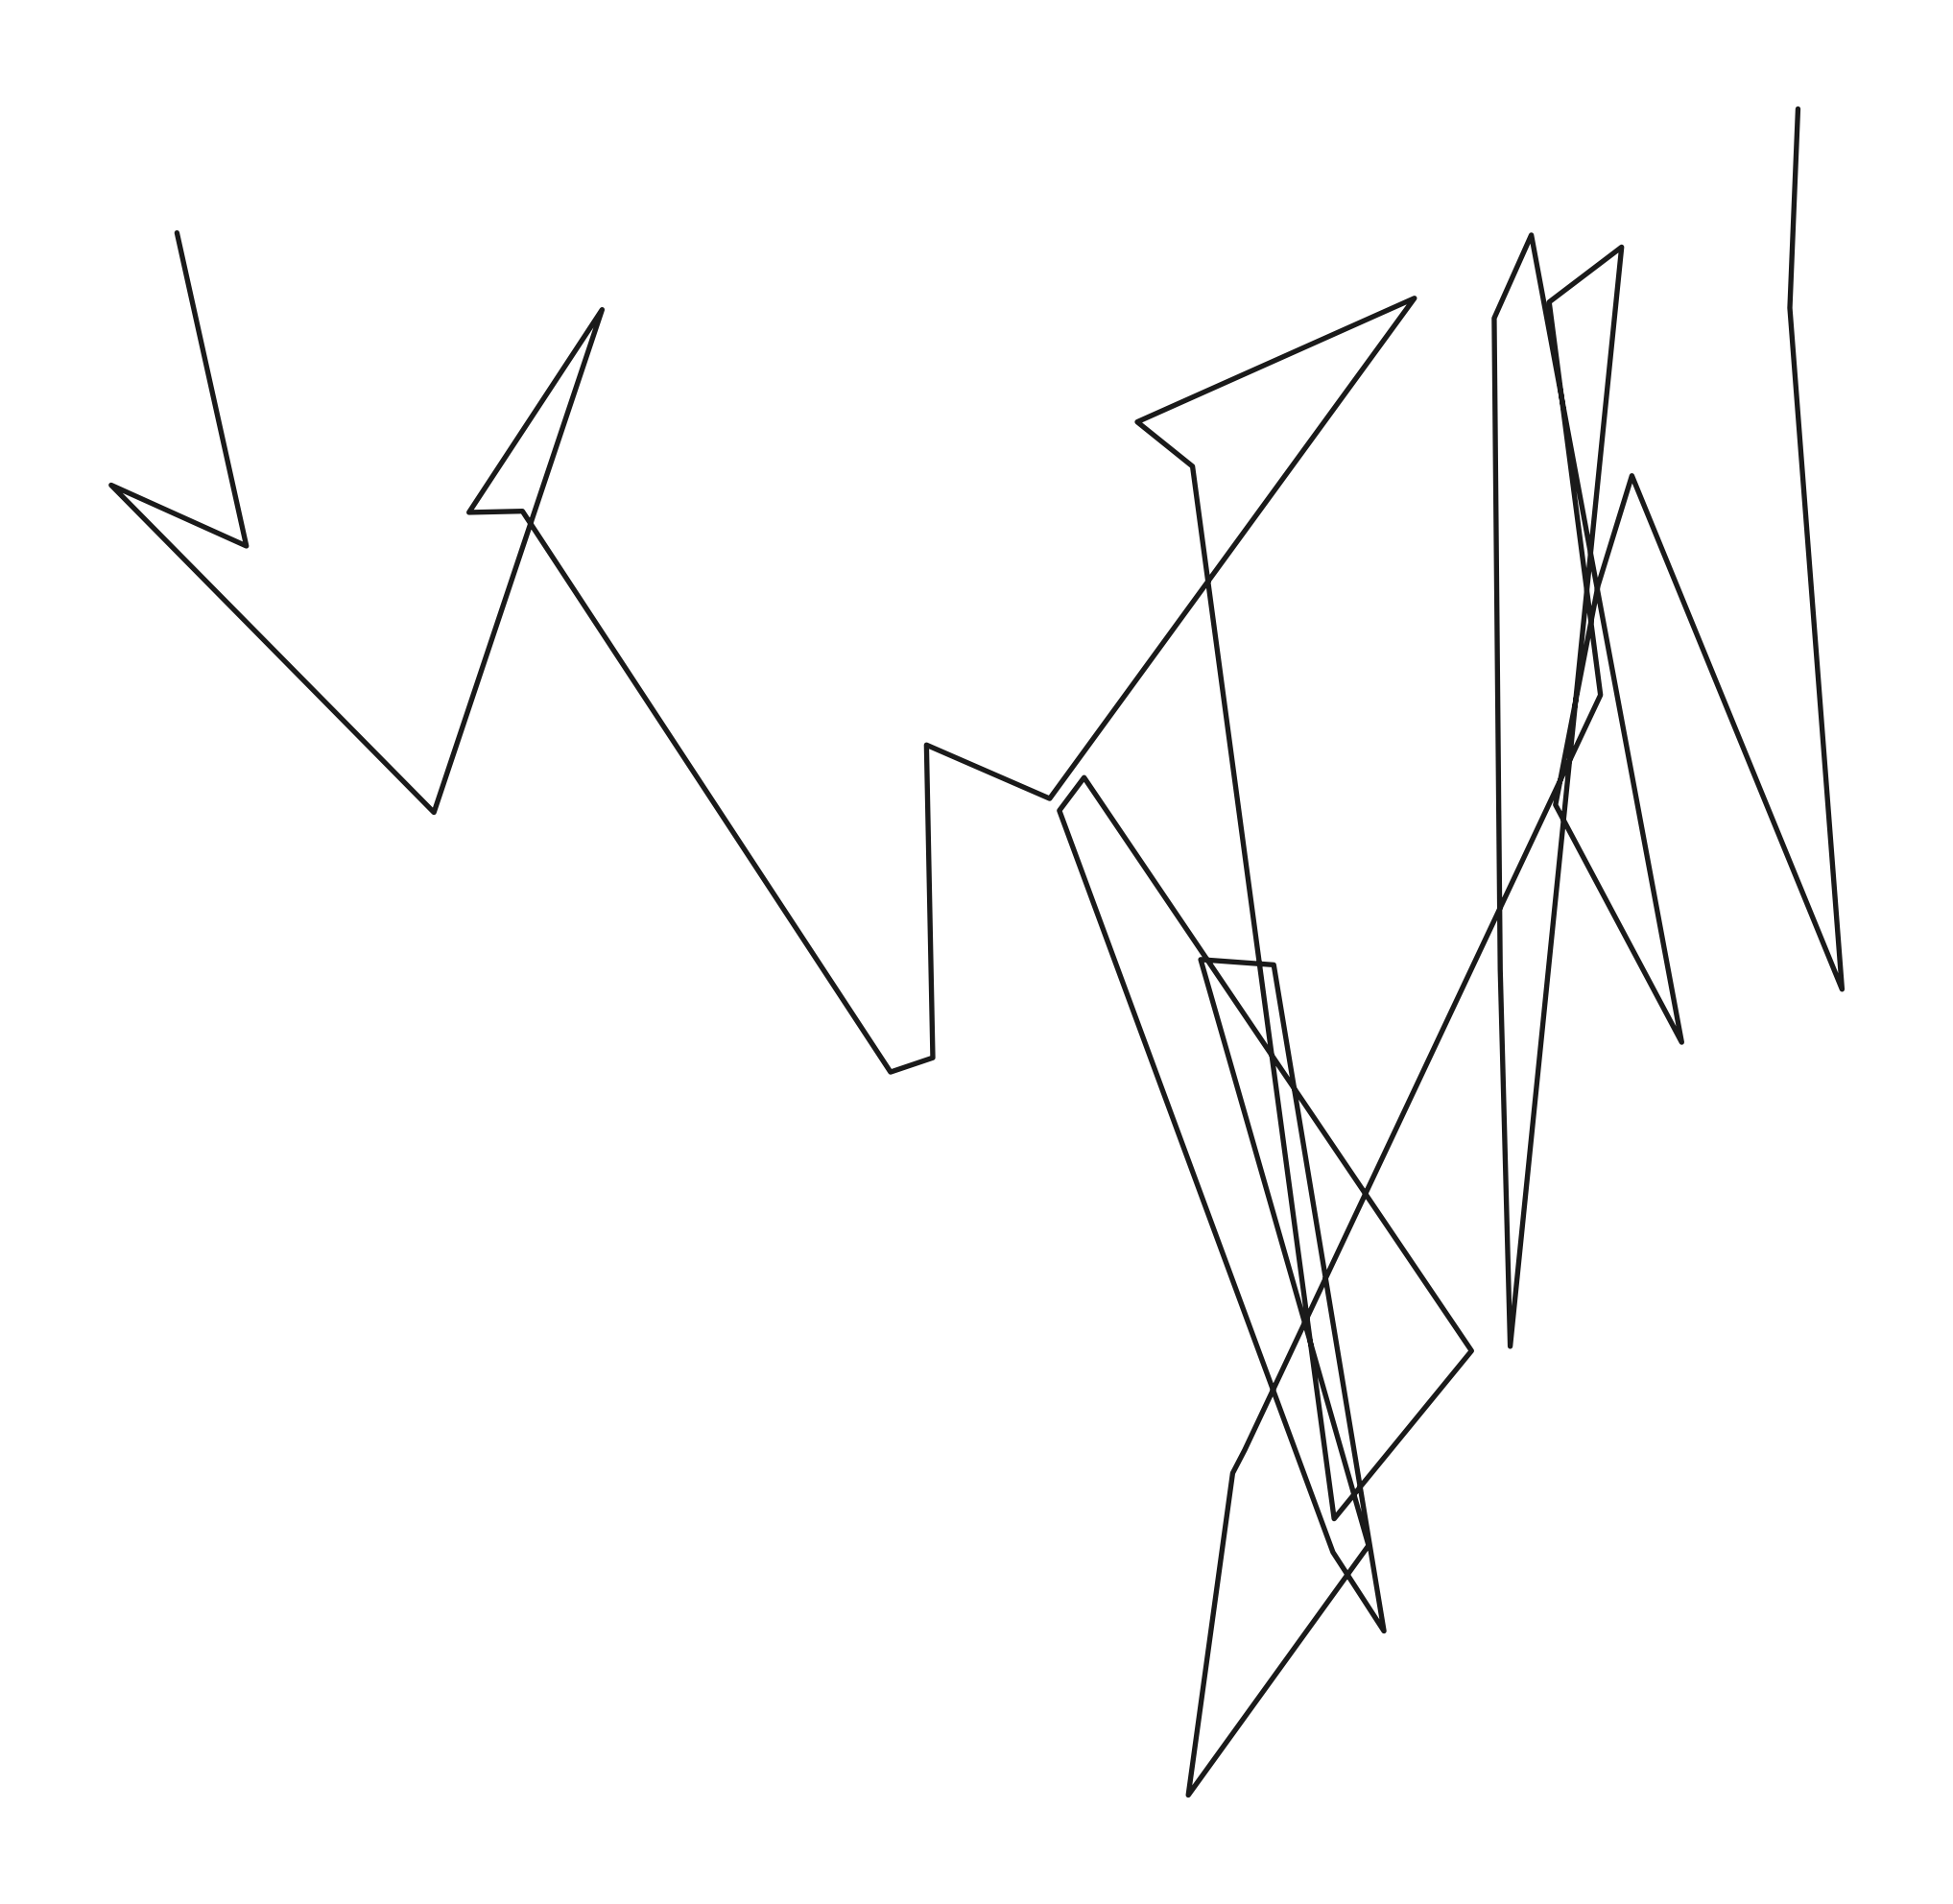

In [23]:
section = 40
for i in np.arange(section, len(x), section):
    f, ax = plt.subplots(1,1,figsize = (10,10),  dpi= 256, sharex = True, sharey = True)
    ax.grid(False)
    ax.axis('off')
    ax.plot(x[i-section:i],y[i-section:i], c= "k")
    ax.set_ylabel("Y Position")
    ax.set_xlabel("X Position")
    pl.savefig(fig_path + "\\test" + str(i) + ".png")

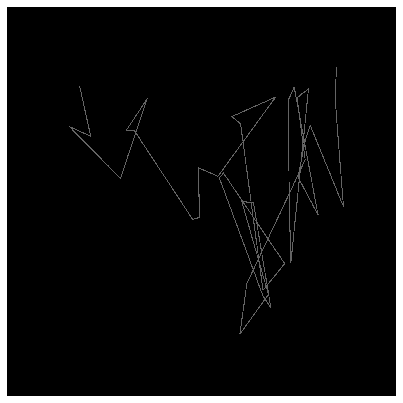

In [24]:
im = cv2.imread(fig_path + "\\test" + str(i) + ".png")
# im = cv2.imread(r"E:\Downloads\sierpinski.png")
im = (im < 255)*100
ax = plt.imshow(im, vmax = 200)
plt.axis('off')
plt.savefig(fig_path + "\\test2.png")

In [25]:
image = cv2.cvtColor(im.astype("uint8"), cv2.COLOR_BGR2GRAY)
x = np.where(image)[1]
y = np.where(image)[0]
# feed the entire thing without the zeros

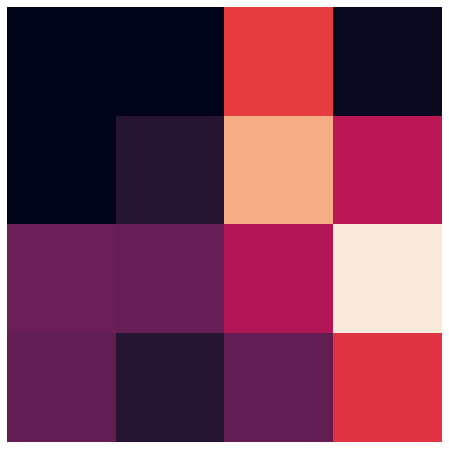

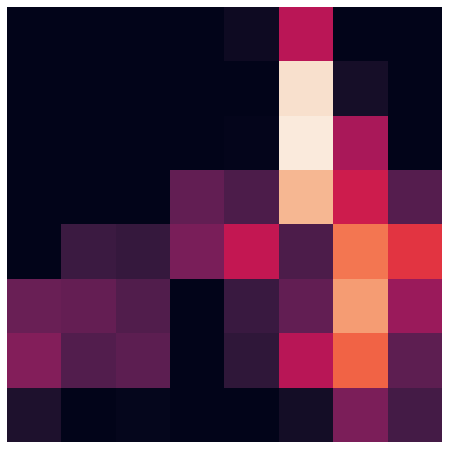

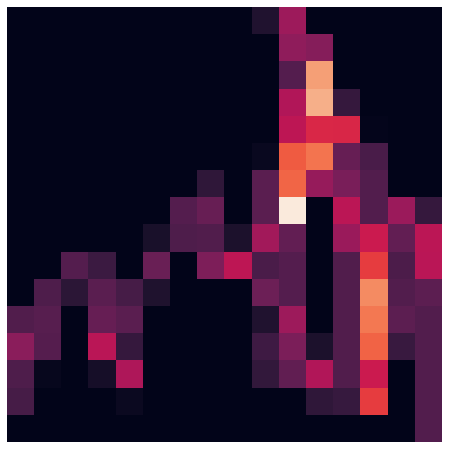

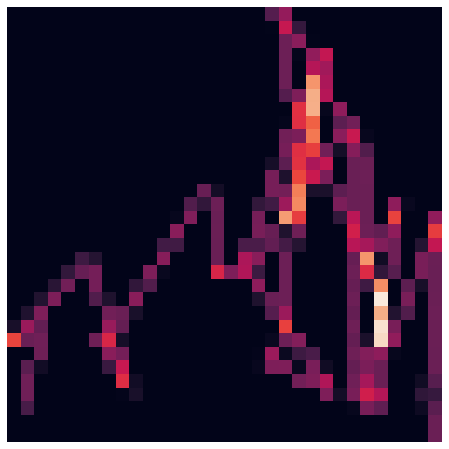

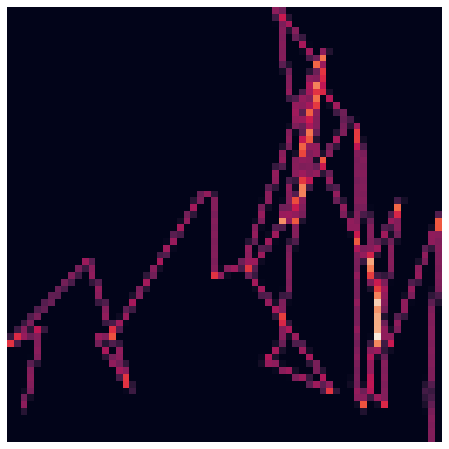

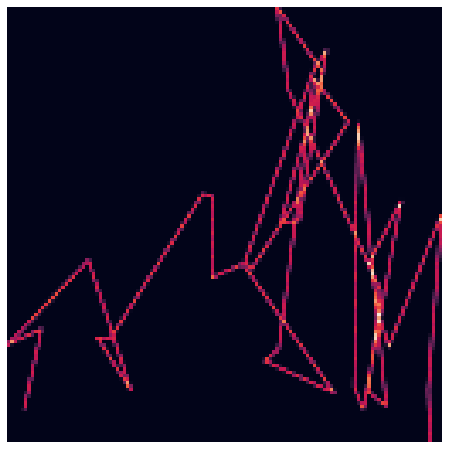

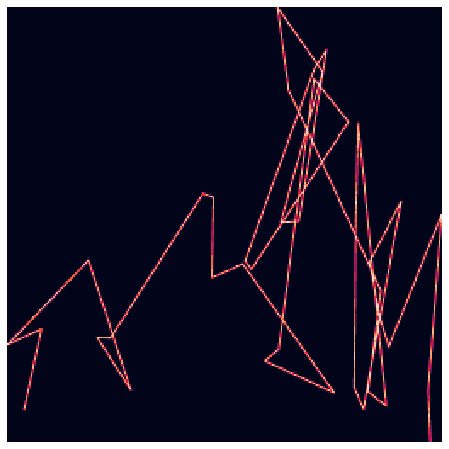

In [12]:
highest_power = 8 
scale = np.logspace(2, highest_power, num = highest_power-1, base = 2)
number_filled = []
dimensions = []
for b in scale:
    bins = b
    heatmap, xedges, yedges = np.histogram2d(-y, x, bins=int(bins))
    box_num = heatmap[heatmap > 0]
    number_filled.append(float(len(box_num)))
    dimension = np.log(len(box_num))/np.log(b)
    dimensions.append(dimension)
    f, ax = plt.subplots(figsize=(8,8))
    plt.imshow(heatmap)
    plt.axis('off')
    plt.savefig(fig_path + "\\heatmap" + str(b) +".png")

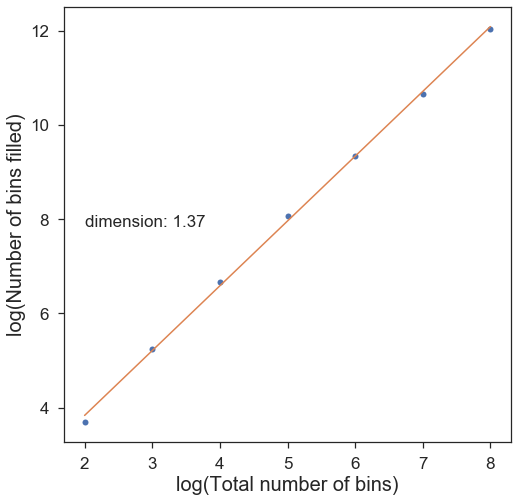

In [26]:
#visualize relationship between number of bins (1/boxlength) and how many boxes it takes to capture trajectory (number of bins with nonzero count)
#using log gives linear relationship between the two. slope of relationship is dimension of trajectory

f, ax = plt.subplots(figsize=(8,8))
plt.plot(np.log(scale)/np.log(2), np.log(number_filled)/np.log(2), "o") 
b, m = polyfit((np.log(scale)/np.log(2)), (np.log(number_filled)/np.log(2)), 1) 
plt.plot((np.log(scale)/np.log(2)), b+ m*(np.log(scale)/np.log(2)))
plt.ylabel("log(Number of bins filled)", size = 20)
plt.xlabel("log(Total number of bins)", size = 20)
for tick in ax.get_yticklabels():
    tick.set_fontsize(17) 
for tick in ax.get_xticklabels():
    tick.set_fontsize(17) 
plt.text(2,np.max(np.log(number_filled))-.5, "dimension: " + "%.2f" % round(m, 2), size = 17)
plt.savefig(fig_path + "\\logplot.png")

In [27]:
csv_list = glob.glob(source + "/*.csv")

In [17]:
csv_list[0][45:-4]

'Experimental_1_0_52688'

In [28]:
t0 = time.time()
p = 45
section = 40
for element in csv_list: 
   
    df = pd.read_csv(element)
    x_,y_ = df.X_position.values, df.Y_position.values
    
    
    for n in np.arange(section, len(x_), section):
        f, ax = plt.subplots(1,1,figsize = (10,10),  dpi= 256, sharex = True, sharey = True)
        ax.grid(False)
        ax.axis('off')
        ax.plot(x_[n-section:n],y_[n-section:n], c= "k")
        ax.set_ylabel("Y Position")
        ax.set_xlabel("X Position")
        impath = "//" + element[p:-4] + str(n) + "track.png"
        pl.savefig(fig_path + impath)
        plt.close()
    
t1 = time.time()
print(t1-t0)      

90.73212575912476


In [37]:
condition = []
dimension = []
highest_power = 7
t0 = time.time()
dimension = []
for element in csv_list: 
     
    if element[p:].startswith("Exp"):
        condition.append("Experimental")
    else:
        condition.append("Sham")
   

    dimension_list = []
    
    
    for n in np.arange(section, len(x_), section):
        
        impath = "\\" + element[p:-4] + str(i) + "track.png"
        
        im = cv2.imread(fig_path + impath)
        im = (im < 255)*100

        image = cv2.cvtColor(im.astype("uint8"), cv2.COLOR_BGR2GRAY)
        x = np.where(image > 0)[1]
        y = np.where(image > 0)[0]

        scale = np.logspace(1, highest_power, num = highest_power, base = 2) 
        number_filled = []
        highest_power = 7 
        scale = np.logspace(2, highest_power, num = highest_power-1, base = 2)
        number_filled = []


        for b in scale:
            
            bins = b
            heatmap, xedges, yedges = np.histogram2d(-y, x, bins=int(bins))

            box_num = heatmap[heatmap > 0]
            number_filled.append(float(len(box_num)))



 
        number_filled = np.asarray(number_filled)




        b, m = polyfit((np.log(scale)/np.log(2)), (np.log(number_filled)/np.log(2)), 1) 
        dimension_list.append(m)

    
    
    dimension.append(np.mean(dimension_list))


new_df = pd.DataFrame({"condition": condition, "dimension": dimension})


In [38]:
new_df.to_csv(fig_path + "\dimension.csv")
new_df

,condition,dimension
0,Experimental,1.383736
1,Experimental,1.503952
2,Experimental,1.376054
3,Experimental,1.221681
4,Experimental,1.228489
5,Experimental,1.389201
6,Experimental,1.409248
7,Sham,1.377405
8,Sham,1.471231
9,Sham,1.438265


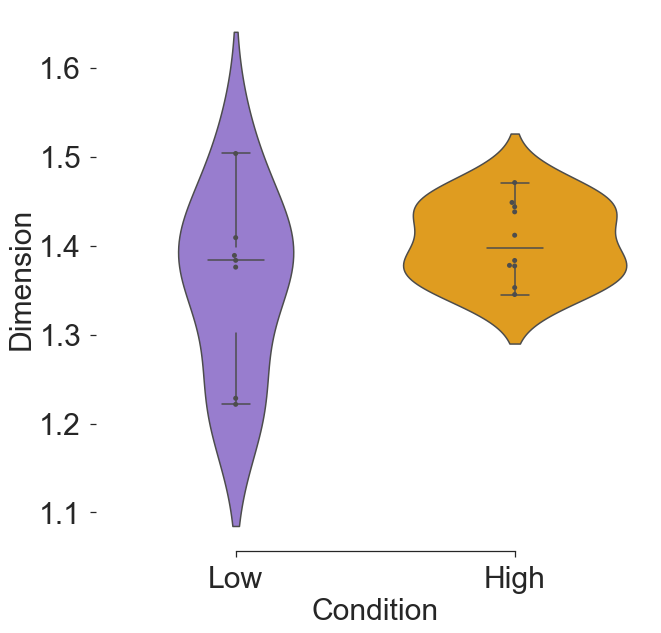

In [43]:
f, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(x="condition", y="dimension", data = new_df, inner = None, palette = ['mediumpurple','orange'])
sns.boxplot(x="condition", y="dimension", data = new_df, width = 0.2)
sns.swarmplot(x = "condition", y = "dimension", data = new_df, size=5, color="0.3", linewidth=0)
plt.xlabel("Condition", size = 30)
plt.ylabel("Dimension", size = 30)
ax.set_xticklabels(["Low","High"], size = 30)
sns.despine(trim=True, left=True)
for tick in ax.get_yticklabels():
    tick.set_fontsize(30) 
ax.xaxis.grid(False)

plt.savefig(fig_path + "dimensionComparison.png")

In [48]:
exp = new_df[new_df.condition == "Experimental"].dimension.values
sham = new_df[new_df.condition == "Sham"].dimension.values
stats.ranksums(exp,sham)

RanksumsResult(statistic=-0.7807200583588266, pvalue=0.4349671606144283)